# **Sentimen Analisis Review APK Play Store: Studi Kasus Aplikasi JKN Mobile**

Pada era digital yang berkembang pesat ini, ulasan pengguna memiliki peran penting dalam membentuk persepsi terhadap aplikasi mobile. Dalam proyek ini, kita akan menjelajahi dunia analisis sentimen untuk memahami bagaimana orang merasakan dan mengungkapkan pendapat mereka tentang aplikasi di Google Play Store, dengan fokus pada aplikasi JKN Mobile.

Analisis sentimen adalah salah satu cabang penting dalam pemrosesan bahasa alami yang memungkinkan kita untuk secara otomatis mengidentifikasi apakah ulasan pengguna cenderung positif atau negatif. Dengan demikian, proyek ini akan membantu kita dalam memahami umpan balik pengguna dengan lebih baik, dan dapat digunakan untuk mengambil keputusan yang lebih baik dalam pengembangan dan perbaikan aplikasi, khususnya JKN Mobile.

Data:

Proyek ini akan menggunakan data ulasan pengguna untuk aplikasi JKN Mobile yang diambil dari Google Play Store. Data ini akan digunakan untuk melatih dan menguji model analisis sentimen.

Dalam perjalanan ini, kita akan menggali konsep-konsep penting dalam analisis sentimen, seperti pengolahan teks, ekstraksi fitur, dan penggunaan model machine learning untuk memprediksi sentimen ulasan. Kami akan menggunakan bahasa pemrograman Python dan beberapa pustaka populer seperti NLTK, scikit-learn, dan TensorFlow.

# **Import Library**

In [8]:
# --- LIBRARY UTAMA UNTUK DATA DAN NUMERIK ---
import pandas as pd  # Manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # Komputasi numerik
np.random.seed(0)  # Seed untuk reproducibility
import random  # Untuk randomisasi

# --- VISUALISASI ---
import matplotlib.pyplot as plt  # Visualisasi data
import seaborn as sns  # Visualisasi statistik
from wordcloud import WordCloud  # Awan kata
from collections import Counter  # Hitung frekuensi kata

# --- PEMROSESAN TEKS DASAR ---
import re  # Ekspresi reguler
import string  # Tanda baca
import csv  # Membaca/menulis file CSV
import datetime as dt  # Tanggal dan waktu

# --- NLP (Natural Language Processing) ---
import nltk  # Toolkit NLP
from nltk.tokenize import word_tokenize  # Tokenisasi
from nltk.corpus import stopwords  # Stopword bahasa Inggris
from textblob import TextBlob  # Sentiment Analysis bahasa Inggris

# --- NLP Bahasa Indonesia ---
# Jalankan hanya jika belum install:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Stopword bahasa Indonesia

# --- WEB & STREAM ---
import requests  # Untuk ambil data dari web
from io import StringIO  # Untuk membaca file dari string

# --- MACHINE LEARNING & PREPROCESSING ---
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vektor teks
from sklearn.model_selection import train_test_split, GridSearchCV  # Pembagian data & optimisasi
from sklearn.preprocessing import LabelEncoder  # Encoding label ke angka
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes Classifier
from sklearn.linear_model import LogisticRegression  # Regresi logistik
from sklearn.metrics import accuracy_score, precision_score  # Evaluasi performa

# --- DEEP LEARNING: TENSORFLOW / KERAS ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, Dense,
    LSTM, SimpleRNN, Bidirectional, Dropout
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical


In [9]:
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Loading Dataset

In [11]:
url = "https://raw.githubusercontent.com/lailarizzah/analisis-sentimen-jkn-mobile/refs/heads/main/ulasan_jkn_mobile.csv"

# Download the CSV file
response = requests.get(url)
with open("ulasan_jkn_mobile.csv", "wb") as f:
    f.write(response.content)

# Read the CSV file and print line 1616
try:
    ulasan_df = pd.read_csv("ulasan_jkn_mobile.csv", delimiter=";", low_memory=False, on_bad_lines='skip')  # skip bad lines
except pd.errors.ParserError as e:
    print(f"Error: {e}")
    print("Inspecting line 1616:")
    with open("ulasan_jkn_mobile.csv", "r") as f:
        for i, line in enumerate(f):
            if i == 1615:  # Line numbers start from 0
                print(line)
                break

ulasan_df.head()

,Review
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K..."
1,udah hampir sebulan yang lalu saya instal ini ...
2,"Aplikasi buruk, tidak bisa verifikasi, pesan n..."
3,Sekarang sering eror gabisa daftar online ke f...
4,Penambahan fitur dan menu didalam aplikasi ini...


In [12]:
# Step 2: Set seed

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Kalau pakai TensorFlow/Keras:
tf.random.set_seed(SEED)

In [13]:
app_reviews_df = pd.DataFrame(ulasan_df)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [14]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(ulasan_df)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape


In [15]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,Review
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K..."
1,udah hampir sebulan yang lalu saya instal ini ...
2,"Aplikasi buruk, tidak bisa verifikasi, pesan n..."
3,Sekarang sering eror gabisa daftar online ke f...
4,Penambahan fitur dan menu didalam aplikasi ini...


In [16]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112485 entries, 0 to 112484
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  112485 non-null  object
dtypes: object(1)
memory usage: 878.9+ KB


In [17]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [18]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112485 entries, 0 to 112484
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  112485 non-null  object
dtypes: object(1)
memory usage: 878.9+ KB


In [19]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

##Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

Distribusi sentimen setelah threshold diperbaiki:
polarity
neutral     104169
positive      2370
negative      1329
Name: count, dtype: int64


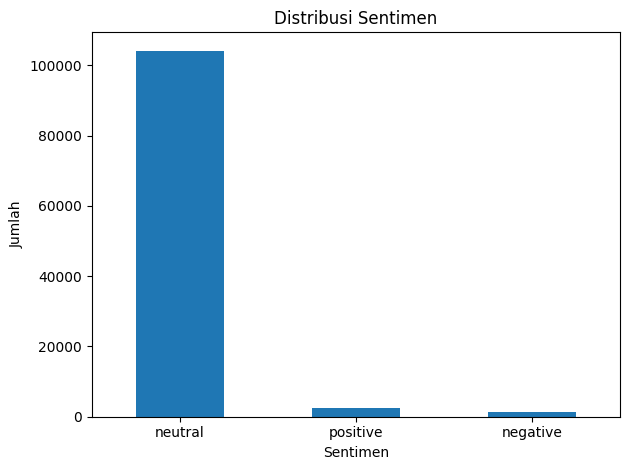

In [20]:
def clean_text(text):
    # lowercase
    text = text.lower()
    # hapus URL
    text = re.sub(r"http\S+|www.\S+", "", text)
    # hapus tanda baca kecuali ! dan ?
    text = re.sub(r"[^a-zA-Z0-9\s!?]", "", text)
    # hapus angka
    text = re.sub(r"\d+", "", text)
    # hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Bersihkan teks
clean_df['clean_content'] = clean_df['Review'].astype(str).apply(clean_text)

# --- SENTIMENT LABELING DENGAN THRESHOLD YANG DIPERBAIKI ---

def get_sentiment(text, pos_thres=0.05, neg_thres=-0.05):  # Perbaiki threshold di sini
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity >= pos_thres:
        return 'positive'
    elif polarity <= neg_thres:
        return 'negative'
    else:
        return 'neutral'

# Terapkan label sentimen
clean_df['polarity'] = clean_df['clean_content'].apply(get_sentiment)

# --- FILTER DATA YANG VALID ---
df_filtered = clean_df[clean_df['polarity'].isin(['positive', 'neutral', 'negative'])]

# --- TAMPILKAN DISTRIBUSI KELAS ---
print("Distribusi sentimen setelah threshold diperbaiki:")
print(df_filtered['polarity'].value_counts())

# Visualisasi
df_filtered['polarity'].value_counts().plot(kind='bar', title='Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- SIMPAN HASIL ---
df_filtered.to_csv("hasil_sentimen_labeling.csv", index=False)


In [23]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [24]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [25]:
clean_df

,Review,clean_content,polarity
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",aplikasi sampah dana buat bikin aplikasi di ko...,neutral
1,udah hampir sebulan yang lalu saya instal ini ...,udah hampir sebulan yang lalu saya instal ini ...,neutral
2,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",aplikasi buruk tidak bisa verifikasi pesan not...,neutral
3,Sekarang sering eror gabisa daftar online ke f...,sekarang sering eror gabisa daftar online ke f...,neutral
4,Penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur dan menu didalam aplikasi ini...,negative
...,...,...,...
112480,Baru updtae malah tambah LOLA!!,baru updtae malah tambah lola!!,neutral
112481,Cara y bikin bingung,cara y bikin bingung,neutral
112482,Bagus aplikasinya!,bagus aplikasinya!,neutral
112483,Ga bisa masuk aneh,ga bisa masuk aneh,neutral


In [26]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [27]:
clean_df

,Review,clean_content,polarity,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",aplikasi sampah dana buat bikin aplikasi di ko...,neutral,APLIKASI SAMPAH dana buat bikin aplikasi di KO...,aplikasi sampah dana buat bikin aplikasi di ko...,aplikasi sampah dana buat bikin aplikasi di ko...,"[aplikasi, sampah, dana, buat, bikin, aplikasi...","[aplikasi, sampah, dana, bikin, aplikasi, koru...",aplikasi sampah dana bikin aplikasi korupsi ap...
1,udah hampir sebulan yang lalu saya instal ini ...,udah hampir sebulan yang lalu saya instal ini ...,neutral,udah hampir sebulan yang lalu saya instal ini ...,udah hampir sebulan yang lalu saya instal ini ...,sudah hampir sebulan yang lalu saya instal ini...,"[sudah, hampir, sebulan, yang, lalu, saya, ins...","[sebulan, instal, apk, ko, login, ambil, foto,...",sebulan instal apk ko login ambil foto layanan...
2,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",aplikasi buruk tidak bisa verifikasi pesan not...,neutral,Aplikasi buruk tidak bisa verifikasi pesan not...,aplikasi buruk tidak bisa verifikasi pesan not...,aplikasi buruk tidak bisa verifikasi pesan not...,"[aplikasi, buruk, tidak, bisa, verifikasi, pes...","[aplikasi, buruk, verifikasi, pesan, notifikas...",aplikasi buruk verifikasi pesan notifikasi mas...
3,Sekarang sering eror gabisa daftar online ke f...,sekarang sering eror gabisa daftar online ke f...,neutral,Sekarang sering eror gabisa daftar online ke f...,sekarang sering eror gabisa daftar online ke f...,sekarang sering eror gabisa daftar online ke f...,"[sekarang, sering, eror, gabisa, daftar, onlin...","[eror, gabisa, daftar, online, faskes, daftar,...",eror gabisa daftar online faskes daftar online...
4,Penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur dan menu didalam aplikasi ini...,negative,Penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur dan menu didalam aplikasi ini...,"[penambahan, fitur, dan, menu, didalam, aplika...","[penambahan, fitur, menu, didalam, aplikasi, s...",penambahan fitur menu didalam aplikasi sederha...
...,...,...,...,...,...,...,...,...,...
112480,Baru updtae malah tambah LOLA!!,baru updtae malah tambah lola!!,neutral,Baru updtae malah tambah LOLA,baru updtae malah tambah lola,baru updtae bahkan tambah lambat berfikir,"[baru, updtae, bahkan, tambah, lambat, berfikir]","[updtae, lambat, berfikir]",updtae lambat berfikir
112481,Cara y bikin bingung,cara y bikin bingung,neutral,Cara y bikin bingung,cara y bikin bingung,cara ya bikin bingung,"[cara, ya, bikin, bingung]","[bikin, bingung]",bikin bingung
112482,Bagus aplikasinya!,bagus aplikasinya!,neutral,Bagus aplikasinya,bagus aplikasinya,bagus aplikasinya,"[bagus, aplikasinya]","[bagus, aplikasinya]",bagus aplikasinya
112483,Ga bisa masuk aneh,ga bisa masuk aneh,neutral,Ga bisa masuk aneh,ga bisa masuk aneh,ga bisa masuk aneh,"[ga, bisa, masuk, aneh]","[masuk, aneh]",masuk aneh


##Pelabelan

In [29]:
# Loads positive lexicon data from GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

# Function to label sentiment based on lexicons
def label_sentiment(text):
    positive_score = 0
    negative_score = 0
    words = text.lower().split()

    for word in words:
        if word in lexicon_positive:
            positive_score += lexicon_positive[word]
        elif word in lexicon_negative:
            negative_score += lexicon_negative[word]

    # Determine sentiment label
    if positive_score > negative_score:
        return "Positif"
    elif negative_score > positive_score:
        return "Negatif"
    else:
        return "Netral"

In [30]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Logika polaritas tiga kelas
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [31]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    66706
positive    27422
neutral     13740
Name: count, dtype: int64


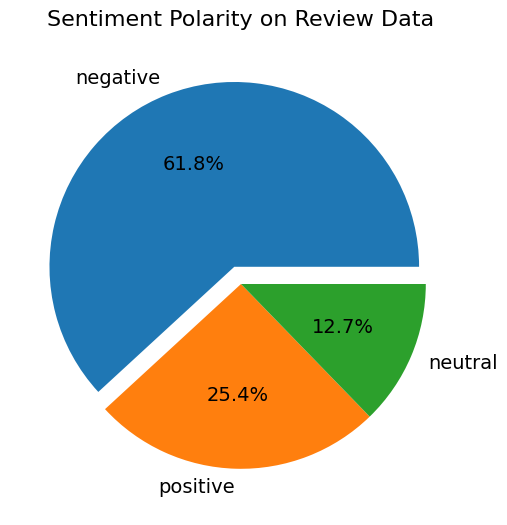

In [32]:
# Membuat objek gambar dan sumbu
fig, ax = plt.subplots(figsize=(6, 6))

# Hitung jumlah data setiap polaritas dan ambil label serta ukurannya
value_counts = clean_df['polarity'].value_counts()
labels = value_counts.index.tolist()
sizes = value_counts.values.tolist()

# Buat explode otomatis: potong hanya bagian pertama
explode = [0.1] + [0] * (len(labels) - 1)

# Buat pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Tambahkan judul
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Tampilkan pie chart
plt.show()

In [33]:
# Mengatur agar kolom teks dapat menampilkan karakter lebih banyak
pd.set_option('display.max_colwidth', 100000)

# Fungsi untuk menampilkan top tweet dari polaritas tertentu
def get_top_tweets_by_polarity(df, polarity_label='positive', top_n=10):
    selected = df[df['polarity'] == polarity_label]
    selected = selected[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
    selected = selected.sort_values(by='polarity_score', ascending=False)
    selected = selected.reset_index(drop=True)
    selected.index += 1
    return selected.head(top_n)

# Contoh penggunaan: ambil 10 tweet dengan sentimen positif skor tertinggi
positive_tweets = get_top_tweets_by_polarity(clean_df, 'positive', top_n=10)

# Jika kamu ingin yang negatif atau netral:
# negative_tweets = get_top_tweets_by_polarity(clean_df, 'negative', top_n=10)
# neutral_tweets = get_top_tweets_by_polarity(clean_df, 'neutral', top_n=10)

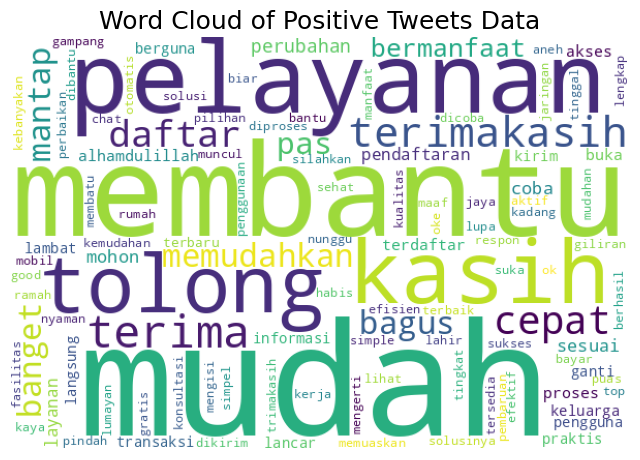

In [34]:
positive_tweets_df = clean_df[clean_df['polarity'] == 'positive']
positive_words = []
for tweet_words in positive_tweets_df['text_stopword']:
    for word in tweet_words:
        if word in lexicon_positive:
            positive_words.append(word)

positive_word_counts = Counter(positive_words)

wordcloud_positive = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate_from_frequencies(positive_word_counts)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.imshow(wordcloud_positive)
ax.axis('off')
plt.show()

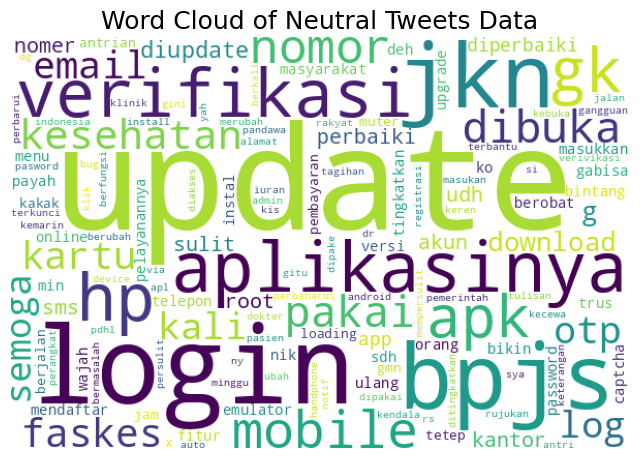

In [35]:
neutral_tweets_df = clean_df[clean_df['polarity'] == 'neutral']
neutral_words = []

for tweet_words in neutral_tweets_df['text_stopword']:
    for word in tweet_words:
        if word not in lexicon_positive and word not in lexicon_negative:
            neutral_words.append(word)

neutral_word_counts = Counter(neutral_words)

wordcloud_neutral = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate_from_frequencies(neutral_word_counts)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
ax.imshow(wordcloud_neutral)
ax.axis('off')
plt.show()

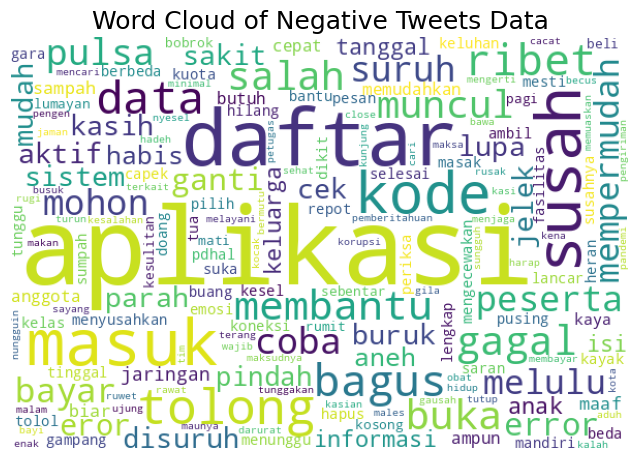

In [36]:
negative_tweets_df = clean_df[clean_df['polarity'] == 'negative']
negative_words = []

for tweet_words in negative_tweets_df['text_stopword']:
    for word in tweet_words:
        if word in lexicon_negative:
            negative_words.append(word)

negative_word_counts = Counter(negative_words)

wordcloud_negative = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate_from_frequencies(negative_word_counts)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.imshow(wordcloud_negative)
ax.axis('off')
plt.show()

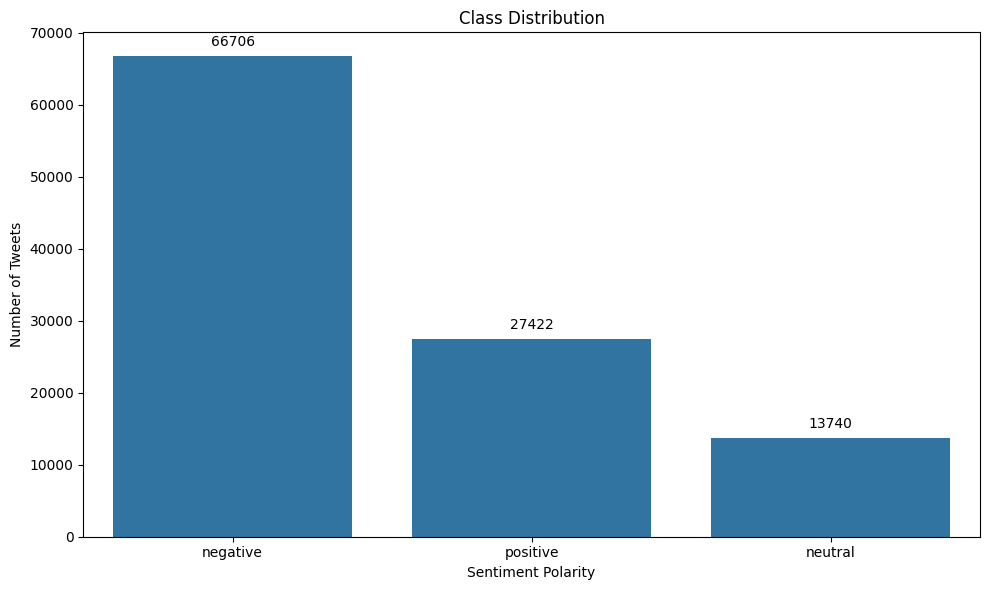

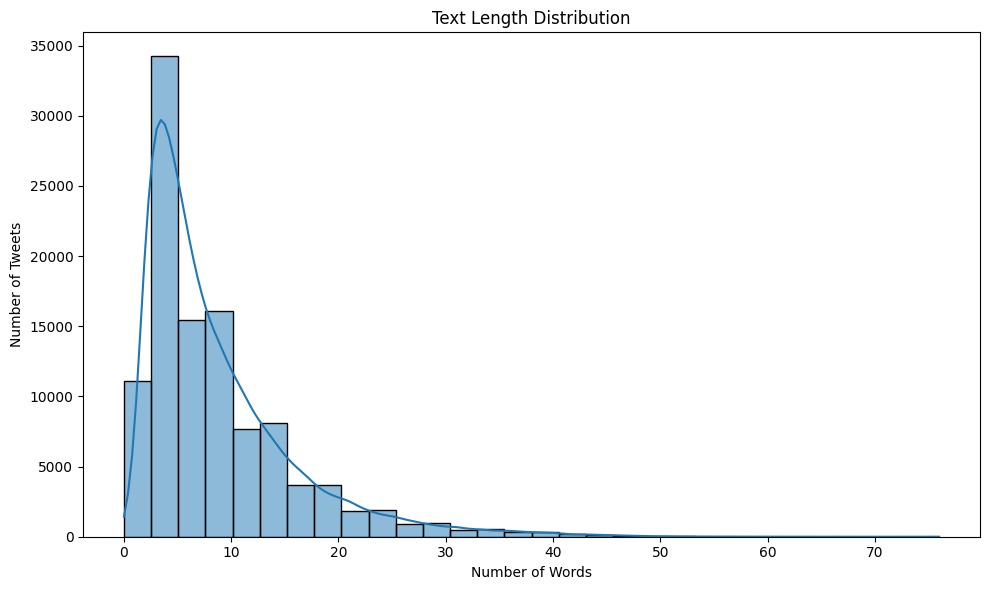

<ipython-input-37-387f32ee4a59>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='word', data=tfidf_sum, palette='viridis')


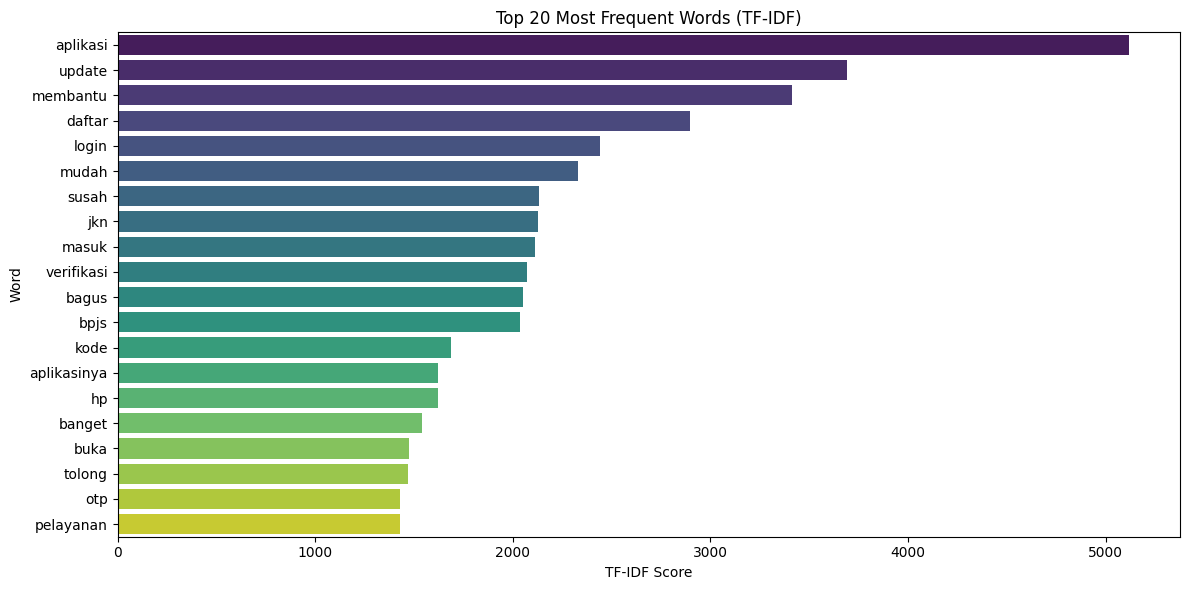

In [37]:
# --- 1. Class Distribution ---
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df, order=clean_df['polarity'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Tweets')

# Add count labels on top of bars
for p in class_dist_plot.patches:
    class_dist_plot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

# --- 2. Text Length Distribution ---
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

# --- 3. Most Frequent Words based on TF-IDF ---
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])

# Sum TF-IDF values and sort
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_sum = tfidf_df.sum().reset_index()
tfidf_sum.columns = ['word', 'jumlah']
tfidf_sum = tfidf_sum.sort_values('jumlah', ascending=False).head(20)

# Plot barplot
sns.barplot(x='jumlah', y='word', data=tfidf_sum, palette='viridis')
plt.title('Top 20 Most Frequent Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

## **Data Splitting**

In [38]:
clean_df.head()

,Review,clean_content,polarity,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,text_length
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di KORUPSI? sampe aplikasi yang harusnya memudahkan masyarakat malah mempersulit, mau daftar susah, otp ga ke kirim kirim, Verifikasi wajah mau 100 tahun pun ga akan bisa, nomor telepon berubah sendiri yang awalnya berakhiran 4096 menjadi 295, kalau gini caranya login gimana kocak, saya lupa password, mau reset tapi nomor keganti sendiri? kocak. aplikasi sampah",aplikasi sampah dana buat bikin aplikasi di korupsi? sampe aplikasi yang harusnya memudahkan masyarakat malah mempersulit mau daftar susah otp ga ke kirim kirim verifikasi wajah mau tahun pun ga akan bisa nomor telepon berubah sendiri yang awalnya berakhiran menjadi kalau gini caranya login gimana kocak saya lupa password mau reset tapi nomor keganti sendiri? kocak aplikasi sampah,negative,APLIKASI SAMPAH dana buat bikin aplikasi di KORUPSI sampe aplikasi yang harusnya memudahkan masyarakat malah mempersulit mau daftar susah otp ga ke kirim kirim Verifikasi wajah mau tahun pun ga akan bisa nomor telepon berubah sendiri yang awalnya berakhiran menjadi kalau gini caranya login gimana kocak saya lupa password mau reset tapi nomor keganti sendiri kocak aplikasi sampah,aplikasi sampah dana buat bikin aplikasi di korupsi sampe aplikasi yang harusnya memudahkan masyarakat malah mempersulit mau daftar susah otp ga ke kirim kirim verifikasi wajah mau tahun pun ga akan bisa nomor telepon berubah sendiri yang awalnya berakhiran menjadi kalau gini caranya login gimana kocak saya lupa password mau reset tapi nomor keganti sendiri kocak aplikasi sampah,aplikasi sampah dana buat bikin aplikasi di korupsi sampai aplikasi yang harusnya memudahkan masyarakat bahkan mempersulit mau daftar susah otp ga ke kirim kirim verifikasi wajah mau tahun pun ga akan bisa nomor telepon berubah sendiri yang awalnya berakhiran menjadi kalau gini caranya login bagaimana kocak saya lupa password mau reset tapi nomor keganti sendiri kocak aplikasi sampah,"[aplikasi, sampah, dana, buat, bikin, aplikasi, di, korupsi, sampai, aplikasi, yang, harusnya, memudahkan, masyarakat, bahkan, mempersulit, mau, daftar, susah, otp, ga, ke, kirim, kirim, verifikasi, wajah, mau, tahun, pun, ga, akan, bisa, nomor, telepon, berubah, sendiri, yang, awalnya, berakhiran, menjadi, kalau, gini, caranya, login, bagaimana, kocak, saya, lupa, password, mau, reset, tapi, nomor, keganti, sendiri, kocak, aplikasi, sampah]","[aplikasi, sampah, dana, bikin, aplikasi, korupsi, aplikasi, memudahkan, masyarakat, mempersulit, daftar, susah, otp, kirim, kirim, verifikasi, wajah, nomor, telepon, berubah, berakhiran, gini, login, kocak, lupa, password, reset, nomor, keganti, kocak, aplikasi, sampah]",aplikasi sampah dana bikin aplikasi korupsi aplikasi memudahkan masyarakat mempersulit daftar susah otp kirim kirim verifikasi wajah nomor telepon berubah berakhiran gini login kocak lupa password reset nomor keganti kocak aplikasi sampah,-29,32
1,"udah hampir sebulan yang lalu saya instal ini apk ko sampai saat ini belum bisa login juga dan selalu masalahnya pada saat ambil foto dan pada akhirnya layanan bermasalah respon dari apk nya ini maksudnya gmna kok serumit ini, tolong dong diperhatikan, sayang kalau dibuat tapi terkadang hal sepele bagian daftar diri untuk login ajah sudah dan itu bikin rumit para user, jadi kemudahannya di bagian mana kalau begini",udah hampir sebulan yang lalu saya instal ini apk ko sampai saat ini belum bisa login juga dan selalu masalahnya pada saat ambil foto dan pada akhirnya layanan bermasalah respon dari apk nya ini maksudnya gmna kok serumit ini tolong dong diperhatikan sayang kalau dibuat tapi terkadang hal sepele bagian daftar diri untuk login ajah sudah dan itu bikin rumit para user jadi kemudahannya di bagian mana kalau begini,negative,udah hampir sebulan yang lalu saya instal ini apk ko sampai saat ini belum bisa l

In [39]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [40]:
# 1. Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=200)  # Adjust max_features as needed

# 2. Fit the vectorizer to your preprocessed text data
# Assuming 'text_akhir' column in 'clean_df' contains the preprocessed text
X_tfidf = vectorizer.fit_transform(clean_df['text_akhir'])

# 3. Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# 4. Create a DataFrame from the TF-IDF matrix
features_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Menampilkan hasil ekstraksi fitur
features_df

,akses,aktif,akun,alamat,alhamdulillah,ampun,anak,aneh,anggota,antrian,...,ubah,udh,ulang,update,upgrade,verifikasi,versi,via,wa,wajah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.135495,0.0,0.0,0.0,0.199304
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.297560,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.337391,0.0,0.0,0.0,0.496277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
107864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
107865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
107866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [41]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [42]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,abal,admin,administrasi,aduh,ah,ajah,ajh,akses,aksesnya,aktif,...,wajah,wajahnya,wajib,warga,watching,web,whatsapp,wifi,yaaa,yah
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.157370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.249963,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.395771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107863,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107864,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107865,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107866,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Skema 1: CNN**
Pada skema 1, algoritma yang digunakan adalah **CNN** dengan ekstraksi fitur **Tokenizer**, pembagian data **80/20**, dan pelabelan menggunakan **One-hot encoding**

In [43]:
# ========== PERSIAPAN DATA ==========
# Encode label ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# ========== SKEMA 1: CNN + TOKENIZER + 80/20 ==========
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=100)

# Memperbaiki: Gunakan X_train1, X_test1, y_train1, y_test1
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)
# atau
# X_train, X_test, y_train, y_test = X_train1, X_test1, y_train1, y_test1

cnn_model = Sequential([
    Embedding(10000, 128),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

# Evaluasi
train_acc = cnn_model.evaluate(X_train, y_train, verbose=1)[1]
test_acc = cnn_model.evaluate(X_test, y_test, verbose=1)[1]

print(f"Skema 1 - CNN + Tokenizer (80/20)")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

Epoch 1/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 130s 95ms/step - accuracy: 0.8391 - loss: 0.4132
Epoch 2/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 142s 95ms/step - accuracy: 0.9492 - loss: 0.1430
Epoch 3/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 145s 98ms/step - accuracy: 0.9643 - loss: 0.0976
Epoch 4/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 141s 97ms/step - accuracy: 0.9729 - loss: 0.0748
Epoch 5/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 141s 96ms/step - accuracy: 0.9775 - loss: 0.0613
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9825 - loss: 0.0463
675/675 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9373 - loss: 0.2344
Skema 1 - CNN + Tokenizer (80/20)
Training Accuracy: 0.9829
Testing Accuracy : 0.9352


## **Skema 2: RNN**
Pada skema pelatihan 2, algoritma yang digunakan adalah **RNN** dengan ekstraksi fitur **Tokenizer**, pembagian data **80/20**, dan pelabelan menggunakan **LabelEncoder + One-hot encoding**

In [44]:
# ========== PREPROCESSING ==========
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

# Encode label + one-hot
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_enc))
y_cat = to_categorical(y_enc, num_classes=num_classes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)

# ========== MODEL RNN ==========
rnn_model = Sequential([
    Embedding(10000, 128),
    SimpleRNN(128),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile & training (tanpa progress bar)
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluasi
train_acc = rnn_model.evaluate(X_train, y_train, verbose=1)[1]
test_acc = rnn_model.evaluate(X_test, y_test, verbose=1)[1]

print(f"Skema 2 - RNN")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")


Epoch 1/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 110s 79ms/step - accuracy: 0.8046 - loss: 0.4924 - val_accuracy: 0.9331 - val_loss: 0.1948
Epoch 2/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 108s 80ms/step - accuracy: 0.9395 - loss: 0.1779 - val_accuracy: 0.9363 - val_loss: 0.2179
Epoch 3/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 110s 82ms/step - accuracy: 0.9520 - loss: 0.1330 - val_accuracy: 0.9409 - val_loss: 0.1872
Epoch 4/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.9602 - loss: 0.1107 - val_accuracy: 0.9492 - val_loss: 0.1715
Epoch 5/5
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 139s 81ms/step - accuracy: 0.9656 - loss: 0.0960 - val_accuracy: 0.9484 - val_loss: 0.1747
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9746 - loss: 0.0694
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9462 - loss: 0.1745
Skema 2 - RNN
Training Accuracy: 0.9747
Testing Accuracy : 0.9484


## Skema 3: LSTM

Pada skema pelatihan 3, algoritma yang digunakan adalah **LSTM** dengan ekstraksi fitur **Tokenizer**, pembagian data **70/30**, dan pelabelan menggunakan **LabelEncoder**

In [45]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ========== PERSIAPAN DATA ==========
# Encode label ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# ========== SKEMA 3: Bi-LSTM + Tokenizer + 70/30 ==========
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_padded, y_categorical, test_size=0.3, random_state=42)

bi_lstm_model = Sequential([
    Embedding(10000, 128),
    Bidirectional(LSTM(128)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile & training
bi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm_model.fit(X_train3, y_train3, epochs=5, batch_size=64, verbose=1)

# Evaluasi
train_acc = bi_lstm_model.evaluate(X_train, y_train, verbose=1)[1]
test_acc = bi_lstm_model.evaluate(X_test, y_test, verbose=1)[1]

print(f"Skema 3 - BiLSTM + Tokenizer (70/30)")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")

Epoch 1/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 563s 473ms/step - accuracy: 0.8395 - loss: 0.4148
Epoch 2/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 555s 466ms/step - accuracy: 0.9565 - loss: 0.1230
Epoch 3/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 562s 467ms/step - accuracy: 0.9715 - loss: 0.0802
Epoch 4/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 564s 469ms/step - accuracy: 0.9790 - loss: 0.0588
Epoch 5/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 557s 472ms/step - accuracy: 0.9844 - loss: 0.0450
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 287s 106ms/step - accuracy: 0.9789 - loss: 0.0819
675/675 ━━━━━━━━━━━━━━━━━━━━ 69s 103ms/step - accuracy: 0.9621 - loss: 0.1492
Skema 3 - BiLSTM + Tokenizer (70/30)
Training Accuracy: 0.9867
Testing Accuracy : 0.9612
